In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.metrics import mean_absolute_error as mae
from sklearn.linear_model import LinearRegression as lr
from sklearn.linear_model import Ridge

In [2]:
df = pd.read_excel("D:/data sets/employee_data.xlsx")

In [3]:
df

,EMPLOYSAT,PERC_IND_PERF,PEER_SUPPORT,ORG_SUPPORT,MGR_SUPPORT,GENDER
0,23,17,25.109030,1,9,0
1,22,21,23.140151,0,8,0
2,27,18,44.875168,1,8,0
3,10,9,23.082298,0,5,0
4,10,15,19.095536,0,4,0
...,...,...,...,...,...,...
84,27,23,38.277987,1,7,0
85,26,16,32.398282,1,9,0
86,17,18,28.709507,1,6,0
87,30,18,34.827301,1,7,1


In [4]:
lst = df.columns[1:7]
for i in lst:
  lst2 = []
  corr = df['EMPLOYSAT'].corr(df[i])
  lst2.append(corr)
  print(f"correlation between EMPLOYSAT and {i} is {corr}")

correlation between EMPLOYSAT and PERC_IND_PERF is 0.5078550529425037
correlation between EMPLOYSAT and PEER_SUPPORT is 0.6742414638985996
correlation between EMPLOYSAT and ORG_SUPPORT is 0.1286844035857202
correlation between EMPLOYSAT and MGR_SUPPORT is 0.514298792042564
correlation between EMPLOYSAT and GENDER is 0.4548600427547294


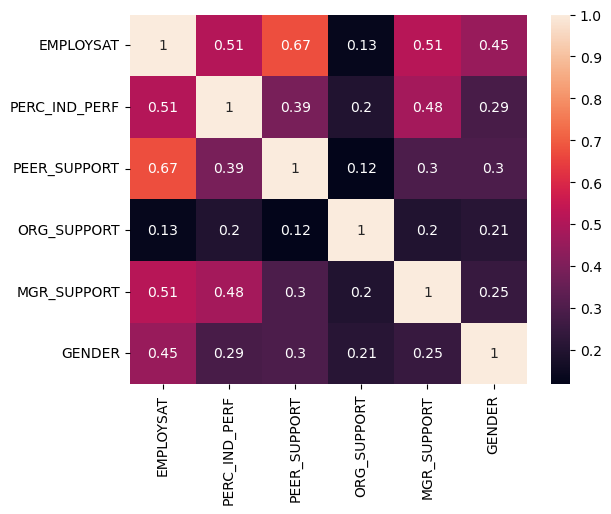

In [4]:
sb.heatmap(df.corr(), annot=True);

In [10]:
mae_baseline = [y_train.mean()]*len(y_train)

In [15]:
df.columns

Index(['EMPLOYSAT', 'PERC_IND_PERF', 'PEER_SUPPORT', 'ORG_SUPPORT',
       'MGR_SUPPORT', 'GENDER'],
      dtype='object')

In [16]:
X_train = df.drop(columns=["EMPLOYSAT", 'GENDER', 'ORG_SUPPORT'])
y_train = df["EMPLOYSAT"]

In [17]:
model = Ridge()
model2 = lr()
model.fit(X_train, y_train)
model2.fit(X_train, y_train)

LinearRegression()

In [18]:
model.score(X_train, y_train)

0.5839434156172476

In [19]:
model2.score(X_train, y_train)

0.5839451482514301

In [20]:
y_pred = model.predict(X_train)

In [21]:
mae(y_train, y_pred)

2.9886874842889726

In [22]:
y_train.mean()

23.0

In [42]:
df['EMPLOYSAT'].describe()

count    89.000000
mean     23.000000
std       5.813386
min       5.000000
25%      20.000000
50%      24.000000
75%      27.000000
max      34.000000
Name: EMPLOYSAT, dtype: float64

In [36]:
data = [{'PERC_IND_PERF':15, 'PEER_SUPPORT':23, 'MGR_SUPPORT':4}]
df2= pd.DataFrame.from_dict(data)
df2

,PERC_IND_PERF,PEER_SUPPORT,MGR_SUPPORT
0,15,23,4


In [37]:
model2.predict(df2)

array([14.4210694])

In [ ]:
PERC_IND_PERF = 15
PEER_SUPPORT = 23
ORG_SUPPORT = No perceived support    
MGR_SUPPORT = 4		
GENDER = Female	


In [24]:
X_train

,PERC_IND_PERF,PEER_SUPPORT,MGR_SUPPORT
0,17,25.109030,9
1,21,23.140151,8
2,18,44.875168,8
3,9,23.082298,5
4,15,19.095536,4
...,...,...,...
84,23,38.277987,7
85,16,32.398282,9
86,18,28.709507,6
87,18,34.827301,7


In [30]:
print(model.coef_)
print(model.intercept_)

[0.19241783 0.35806013 0.90852815 2.30711925]
-0.674397720087903
